<a href="https://colab.research.google.com/github/Praveenpaduchuri/GMW-Data-Science/blob/main/Project_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Terrorism Dataset**

Exploratory Data Analysis (EDA) is an approach to analyse the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summaries and graphical representations. EDA on terrorism dataset is performed to determine the hot zone of terrorism and the relationship between different features is displayed.

The global terrorism dataset is downloaded from here

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [7]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

In [8]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [9]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 7316 rows and 135 columns in the dataset


In [10]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Checking the uniqueness of the columns of the dataset

In [11]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


Renaming the columns we are going to use for our analysis

In [12]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [13]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Selecting only those columns which are actually required

In [21]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [15]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Checking the updated shape of the dataset

In [16]:
terrorism_df.shape

(7316, 135)

Checking for the null values

In [17]:
terrorism_df.isnull().sum()

eventid          0
Year             0
Month            0
Day              0
approxdate    7300
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       6847
Length: 135, dtype: int64

Filling the NaN values

In [58]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [59]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [60]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [64]:
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [61]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1979,1,9,Myanmar,Southeast Asia,Shan,Mong Tong,Armed Assault,Military,Military Unit/Patrol/Convoy,People's Army (Myanmar),Firearms
7312,1979,1,9,Italy,Western Europe,Lazio,Rome,Hostage Taking (Kidnapping),Journalists & Media,Radio Journalist/Staff/Facility,Armed Revolutionary Nuclei (NAR),Firearms
7313,1979,1,9,United Kingdom,Western Europe,Northern Ireland,Belfast,Armed Assault,Police,Police Patrol (including vehicles and convoys),Irish Republican Army (IRA),Firearms
7314,1979,1,10,Italy,Western Europe,Lazio,Rome,Facility/Infrastructure Attack,Government (General),Politician or Political Party Movement/Meeting...,Italian Social Movement (MSI),Incendiary


In [62]:
terrorism_df.shape

(7316, 12)

In [63]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         1
Weapon_type       1
dtype: int64

In [27]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [28]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [29]:
terrorism_df.columns.nunique()

12

In [30]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 102 countries were noted in the data


In [31]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia']


In [32]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [33]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [34]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown'
 'Black Nationalists' 'Tupamaros (Uruguay)' "New Year's Gang"
 'Weather Underground, Weathermen' 'Left-Wing Militants'
 'Armed Commandos of Liberation' 'Commune 1' 'Eritrean Liberation Front'
 'Strikers' 'Student Radicals' 'White extremists'
 'Armed Forces of National Liberation- Venezuela (FALN)'
 "New People's Army (NPA)"
 'Armed Revolutionary Independence Movement (MIRA)'
 'Popular Front for the Liberation of Palestine (PFLP)'
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)'
 '1st of May Group' 'Rebel Armed Forces of Guatemala (FAR)' 'Ku Klux Klan'
 'Popular Revolutionary Vanguard (VPR)' 'Revolutionary Force 9'
 'Puerto Rican Nationalists' 'Chicano Liberation Front'
 'Puerto Rican Resistance Movement' 'Black Panthers'
 'Dominican Popular Movement (MPD)' 'Argentine Liberation Front (FAL)'
 'Argentine National Organization Movement (MANO)'
 'Japanese Red Army (JRA)' 'Saor Eire (Irish Republican Group)'
 'New W

In [35]:
print(terrorism_df['Gang_name'].nunique())

504


In [36]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' nan]


In [37]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            7316 non-null   int64 
 1   Month           7316 non-null   int64 
 2   Day             7316 non-null   int64 
 3   Country         7316 non-null   object
 4   Region          7316 non-null   object
 5   State           7316 non-null   object
 6   City            7316 non-null   object
 7   Attack_type     7316 non-null   object
 8   Target_type     7316 non-null   object
 9   Target_subtype  7316 non-null   object
 10  Gang_name       7315 non-null   object
 11  Weapon_type     7315 non-null   object
dtypes: int64(3), object(9)
memory usage: 686.0+ KB


In [38]:
terrorism_df.describe()

,Year,Month,Day
count,7316.000000,7316.000000,7316.000000
mean,1975.003417,6.523237,15.129579
std,2.675243,3.477868,9.053688
min,1970.000000,0.000000,0.000000
25%,1973.000000,3.000000,7.000000
50%,1976.000000,6.000000,15.000000
75%,1977.000000,10.000000,23.000000
max,1979.000000,12.000000,31.000000


In [39]:
terrorism_df['Country'].value_counts().head(10)

United Kingdom        1407
United States         1406
Italy                  824
Spain                  632
Turkey                 343
Argentina              314
Colombia               282
France                 265
West Germany (FRG)     256
Greece                 134
Name: Country, dtype: int64

In [40]:
terrorism_df['Region'].value_counts().head(10)

Western Europe                 3701
North America                  1517
South America                   778
Middle East & North Africa      639
Central America & Caribbean     325
Sub-Saharan Africa              120
Southeast Asia                  116
East Asia                        63
Eastern Europe                   25
South Asia                       17
Name: Region, dtype: int64

In [41]:
terrorism_df['State'].value_counts().head(10)

Northern Ireland    1278
California           393
New York             336
Lazio                307
Buenos Aires         227
Unknown              203
Madrid               159
Lombardy             148
Paris                136
England              124
Name: State, dtype: int64

In [42]:
terrorism_df['Target_subtype'].value_counts().head(10)

Religion Identified                                        513
others                                                     419
Military Personnel (soldiers, troops, officers, forces)    389
Bank/Commerce                                              383
Police Security Forces/Officers                            375
Retail/Grocery/Bakery                                      369
Embassy/Consulate                                          356
Government Building/Facility/Office                        282
Multinational Corporation                                  266
Politician or Political Party Movement/Meeting/Rally       264
Name: Target_subtype, dtype: int64

In [45]:
terrorism_df['City'].value_counts().head(10)

Belfast          732
New York City    317
Rome             290
Unknown          212
Buenos Aires     188
Madrid           152
Paris            137
Athens           121
Ankara           115
Bogota           106
Name: City, dtype: int64

In [46]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      3277
Assassination                          1490
Armed Assault                           989
Facility/Infrastructure Attack          908
Hostage Taking (Kidnapping)             395
Hostage Taking (Barricade Incident)      96
Unknown                                  91
Hijacking                                52
Unarmed Assault                          18
Name: Attack_type, dtype: int64

In [47]:
terrorism_df['Target_type'].value_counts().head(10)

Business                       1877
Private Citizens & Property    1155
Military                        837
Government (General)            809
Police                          713
Government (Diplomatic)         579
Airports & Aircraft             225
Educational Institution         205
Journalists & Media             197
Utilities                       151
Name: Target_type, dtype: int64

In [48]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                          1980
Irish Republican Army (IRA)                       820
Basque Fatherland and Freedom (ETA)               263
Protestant extremists                             188
Left-Wing Militants                               169
Ulster Volunteer Force (UVF)                      164
Red Brigades                                      124
Black September                                   120
Montoneros (Argentina)                            109
Fuerzas Armadas de Liberacion Nacional (FALN)      96
Name: Gang_name, dtype: int64

In [49]:
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    3415
Firearms      2146
Incendiary    1098
Unknown        555
Melee           64
Name: Weapon_type, dtype: int64

Visualizing the dataset

Attack by weapons type

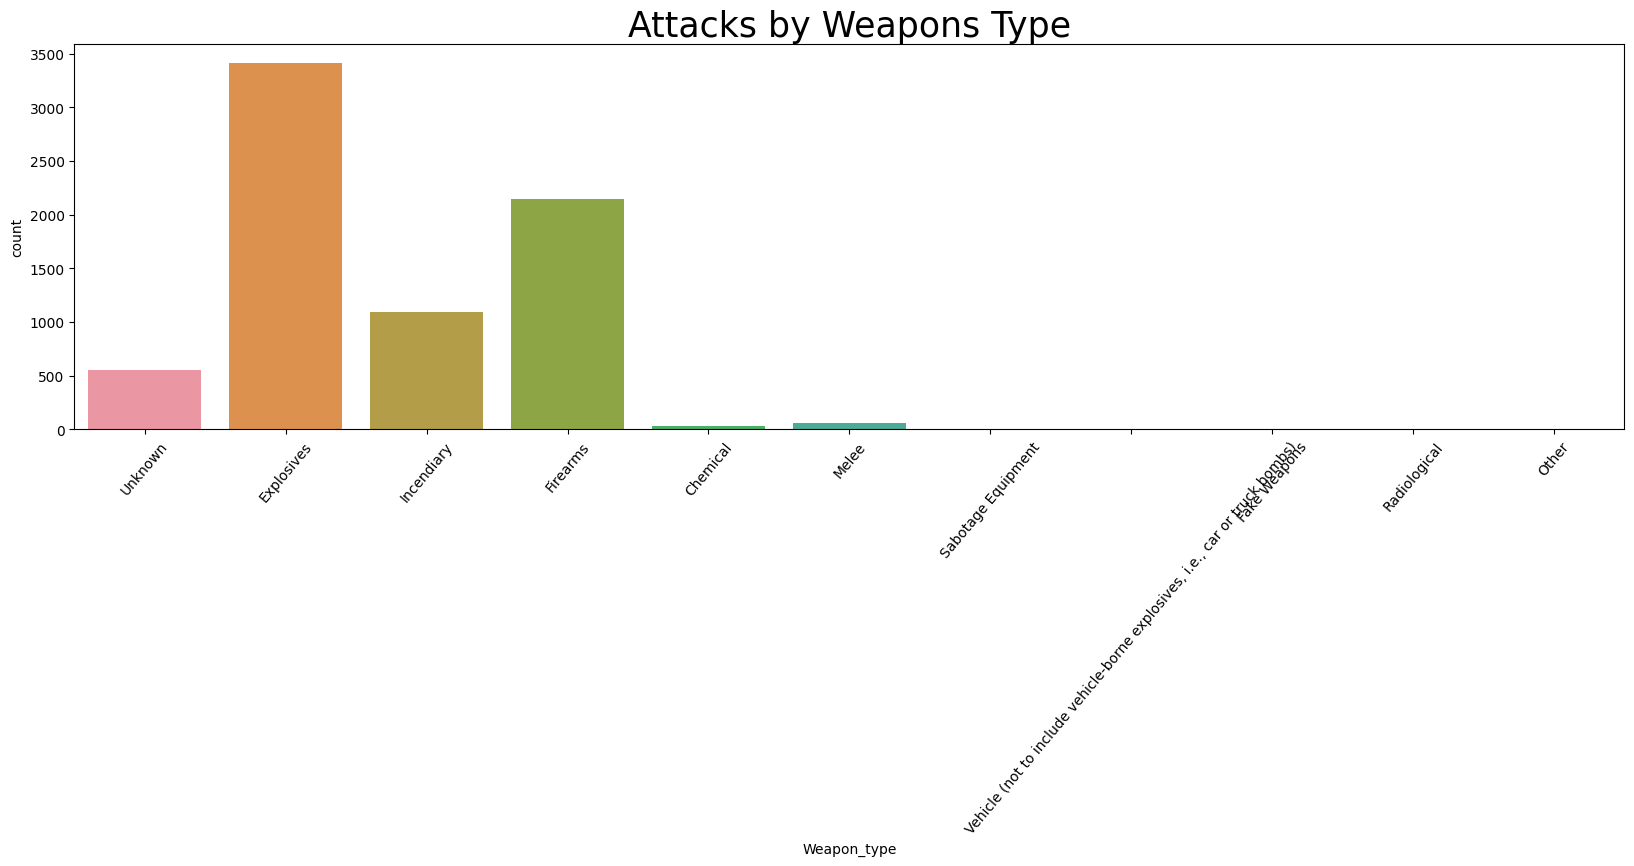

In [50]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons Type', fontsize = 25)
sns.countplot(x=terrorism_df.Weapon_type);

Attacks by year

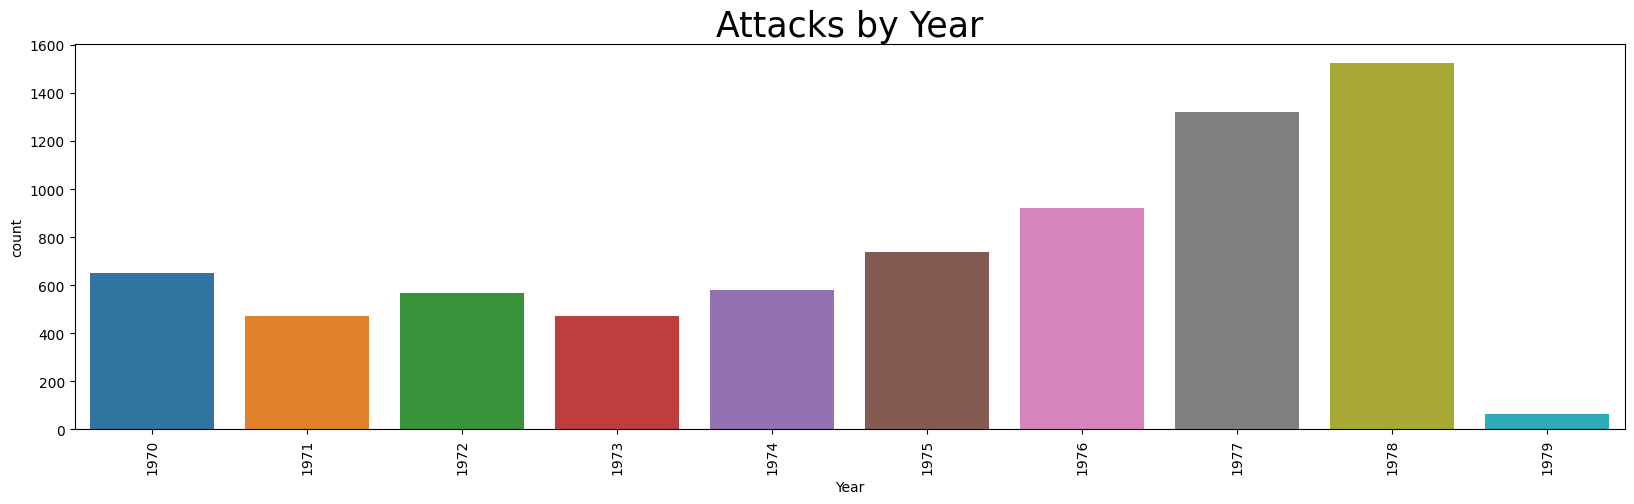

In [51]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 25)
sns.countplot(x=terrorism_df.Year);

Attacks by month

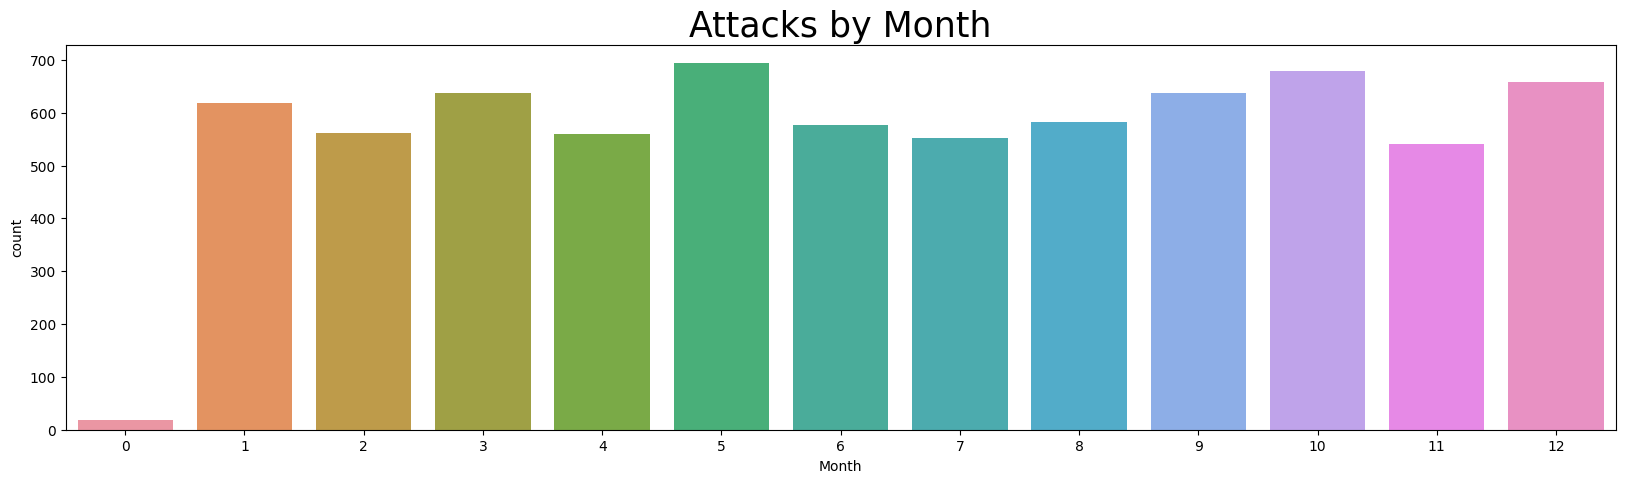

In [52]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month', fontsize = 25)
sns.countplot(x=terrorism_df.Month);

Attacks by day

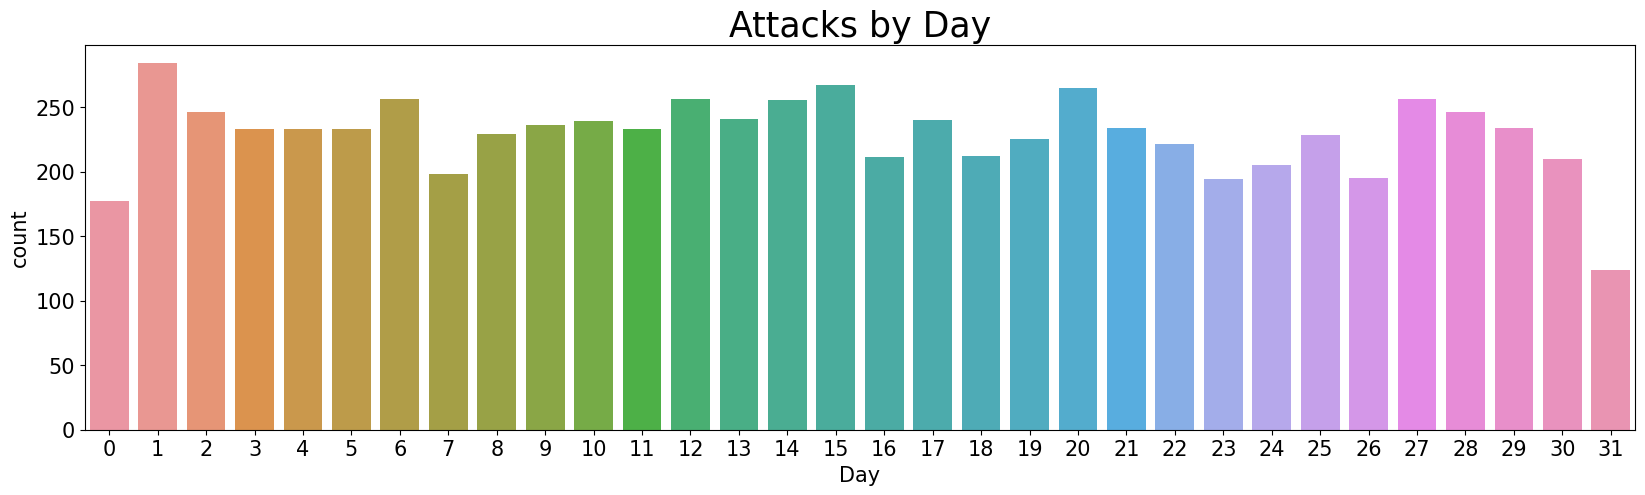

In [69]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 25)
sns.countplot(x=terrorism_df.Day);

Attacks by region

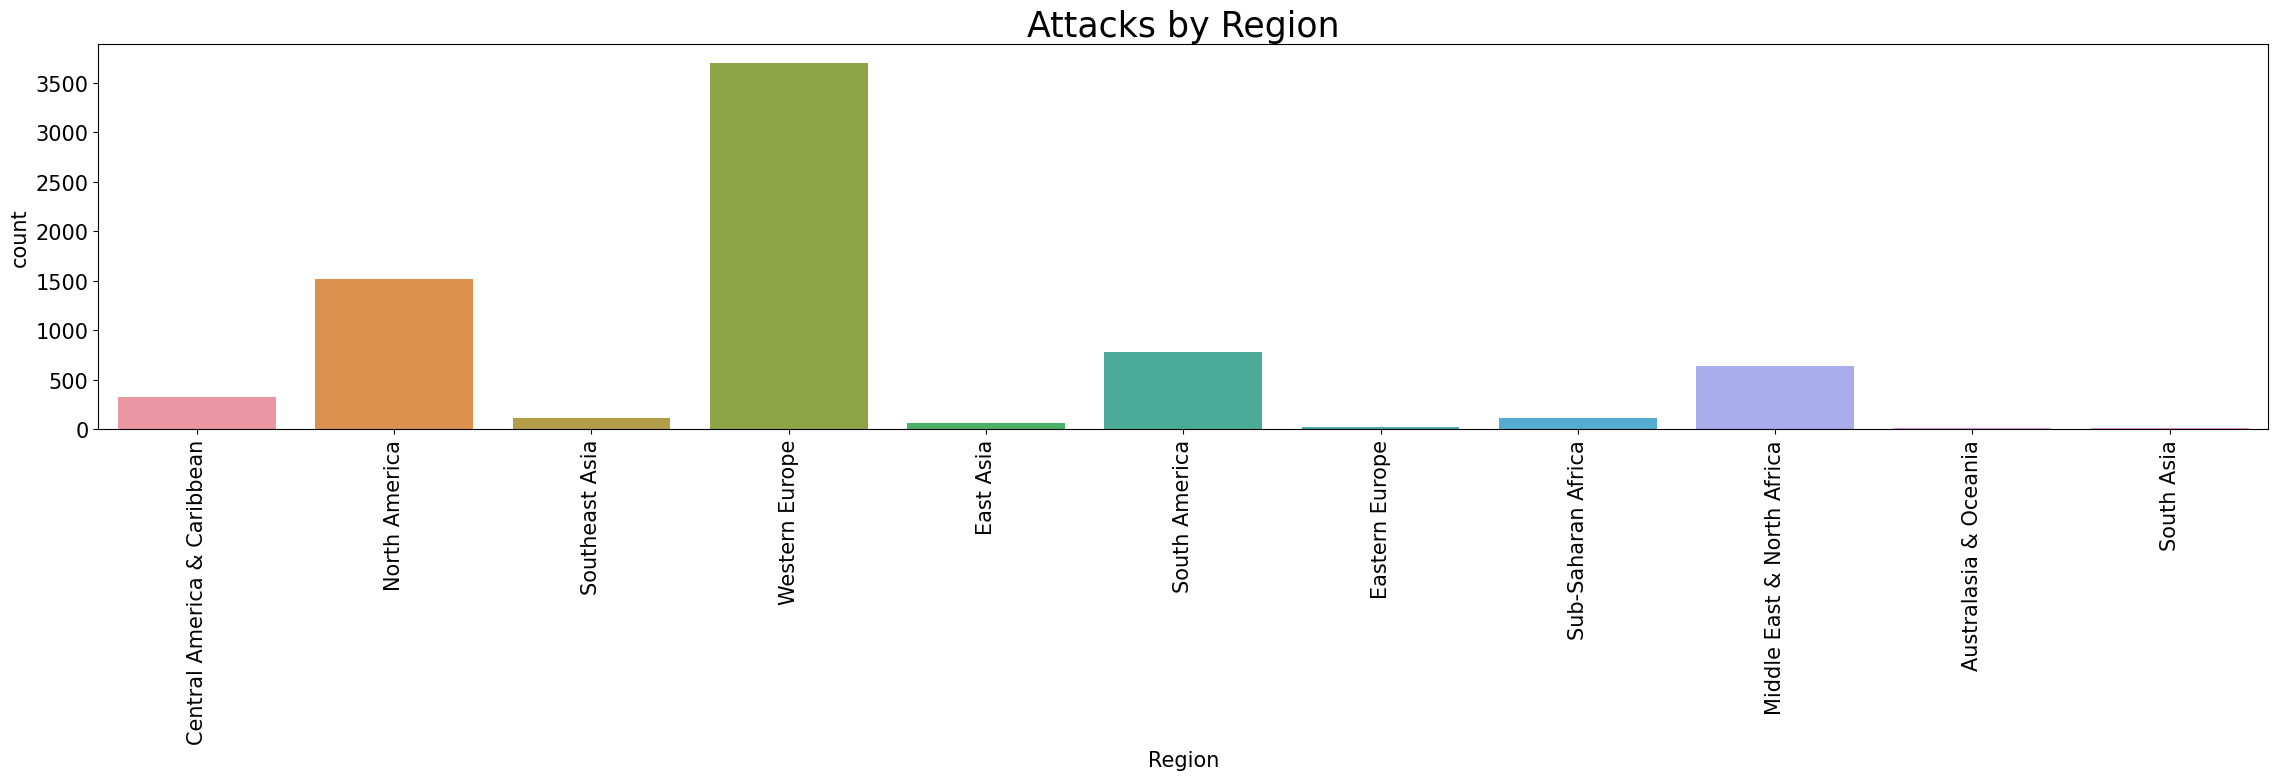

In [57]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Attacks by Region', fontsize =25)
sns.countplot(x=terrorism_df.Region);

Attack based on target type

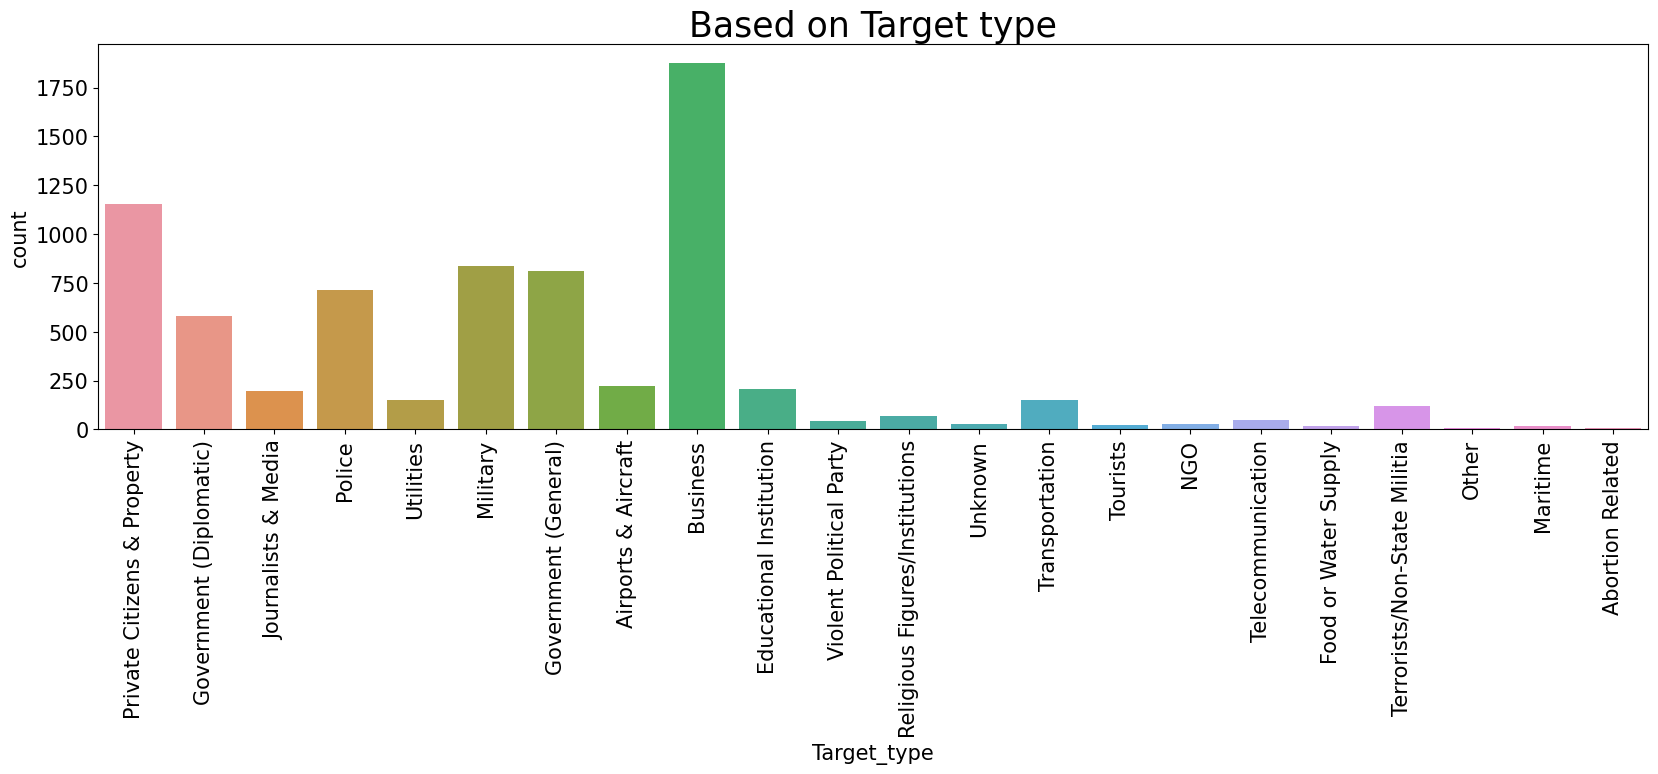

In [56]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =25)
sns.countplot(x=terrorism_df.Target_type);

Attacks based on attack type

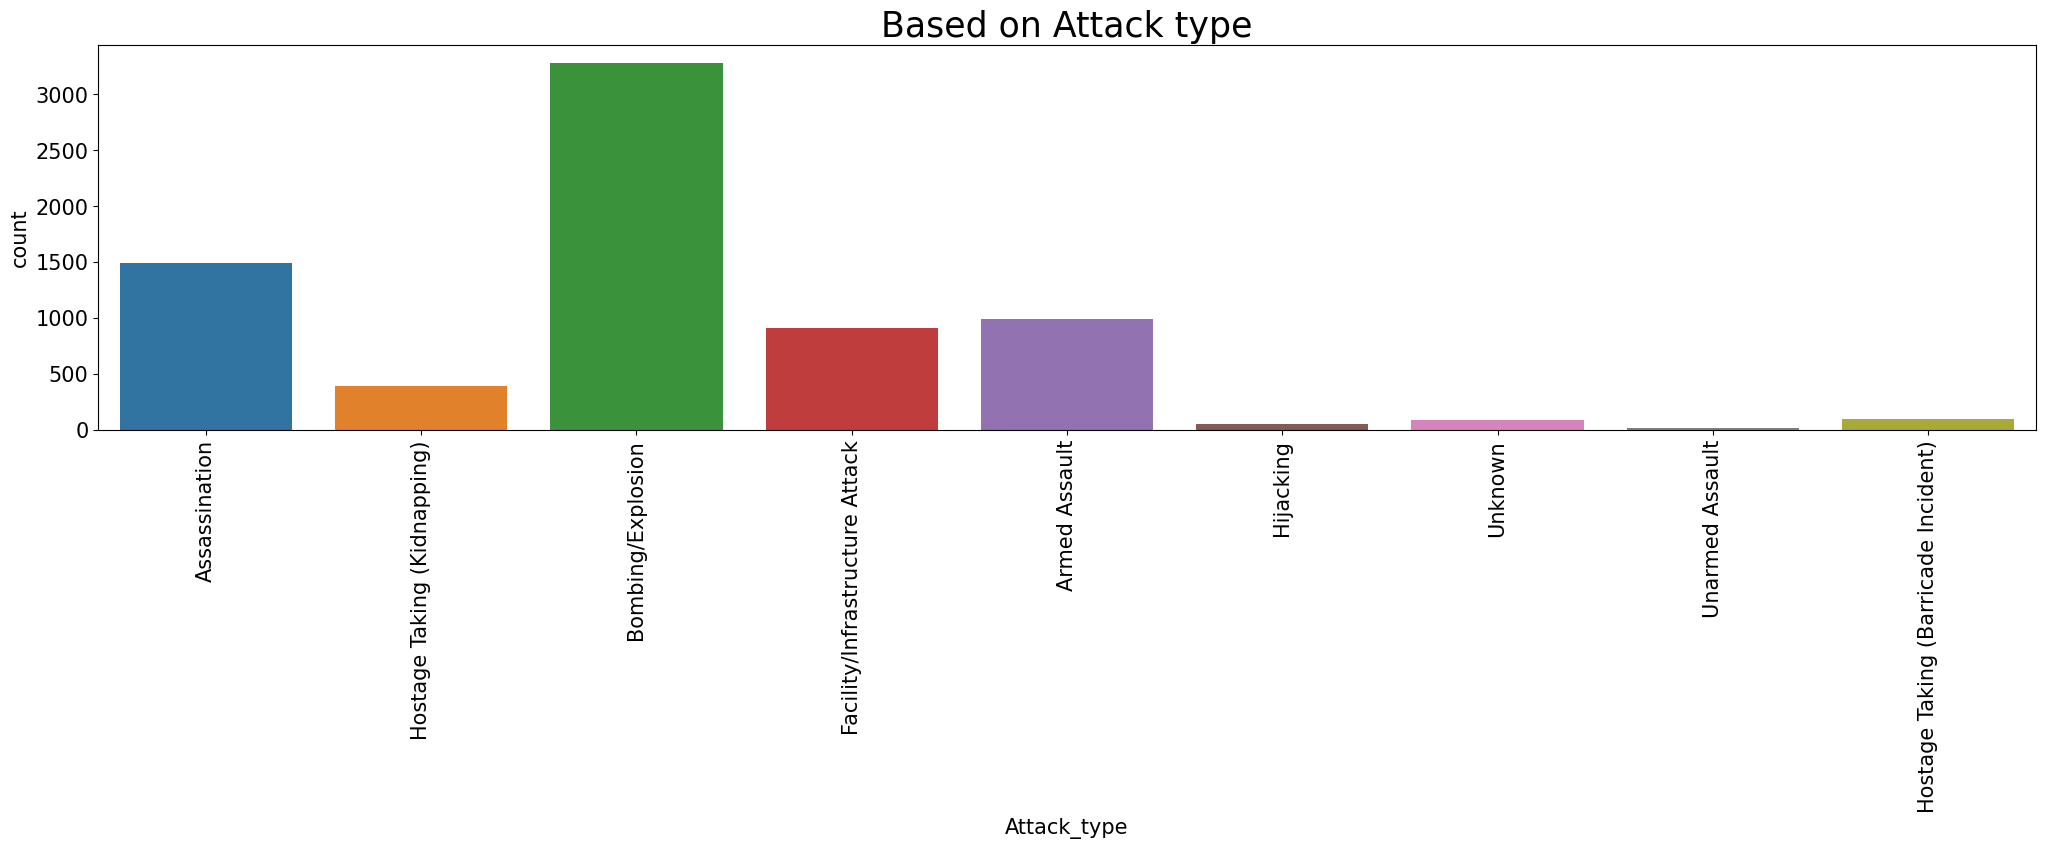

In [55]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 25)
sns.countplot(x=terrorism_df.Attack_type);

**Result of Analysis**

After observing different graphs, we obtained the following results:

Explosive : Most used weapon type in attacks

2014 : Most number of attacks year

5th month(May) : Most number of attacks month

15th day of month : Most number of attacks day

Iraq : Most attacked country

Baghdad : Most attacked State

Middle East and North America : Most attacked region

Private Citizens and Property : Most attack based on target type

Bombing /Explosion : Most attack based on attack type

**Security issues and insight from the EDA**


From above result of analysis it is clear that explosive is the most used weapon type in the attacks. And keeping track of other result. Following measures can be adopted to reduce the number of attacks and terrorism.

The government should firmly tighten border security

Strict immigration laws and regulations should be put in place.

It is important to restrict access to lethal weapons.

States should ensure their internal security.